In [8]:
import proplot as pplt
import xarray as xr
import geopandas as gpd
from pathlib import Path

In [9]:
Path("plots").mkdir(exist_ok=True)

In [2]:
attrs = gpd.read_feather("camels_attributes_v2.0.feather")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
conus_geom = world[world.iso_a3 == "USA"].geometry.iloc[0].geoms[0]
conus = gpd.GeoSeries(conus_geom, crs=world.crs).to_crs(5070)

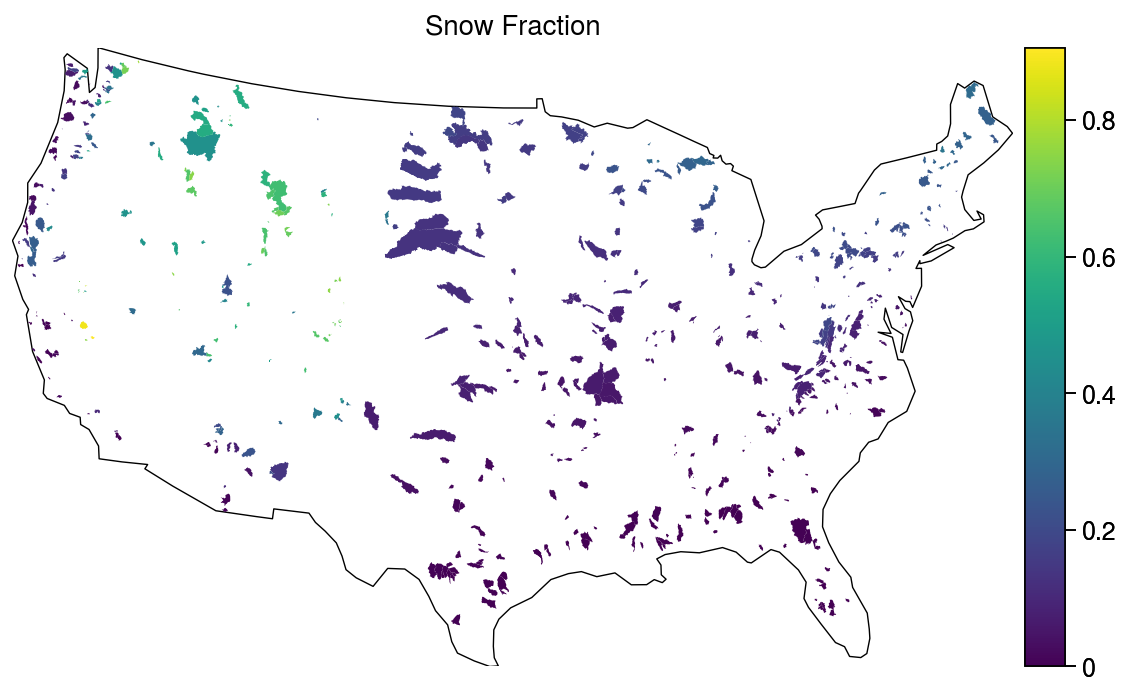

In [10]:
fig, ax = pplt.subplots(refwidth=5, facecolor="w")
ax.format(grid=False, title="Snow Fraction")
conus.plot(ax=ax, facecolor="none", edgecolor="k", linewidth=0.5)
attrs.to_crs(5070).plot(ax=ax, column="frac_snow", legend=True, cmap="viridis")
ax.set_axis_off()
ax.margins(0)
fig.savefig(Path("plots", "camels_snow_fraction.png"))

In [4]:
qobs = xr.open_zarr("camels_attrs_v2_streamflow_v1p2.zarr")

In [5]:
qobs

<xarray.Dataset>
Dimensions:               (station_id: 671, time: 12784)
Coordinates:
  * station_id            (station_id) object '01013500' ... '14400000'
  * time                  (time) datetime64[ns] 1980-01-01 ... 2014-12-31
Data variables: (12/60)
    area_gages2           (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    area_geospa_fabric    (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    aridity               (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    baseflow_index        (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    carbonate_rocks_frac  (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    clay_frac             (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    ...                    ...
    soil_depth_pelletier  (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    soil_depth_statsgo    (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    soil_porosity         (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    stream_elas           (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    water_frac            (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>
    zero_q_freq           (station_id) float64 dask.array<chunksize=(671,), meta=np.ndarray>

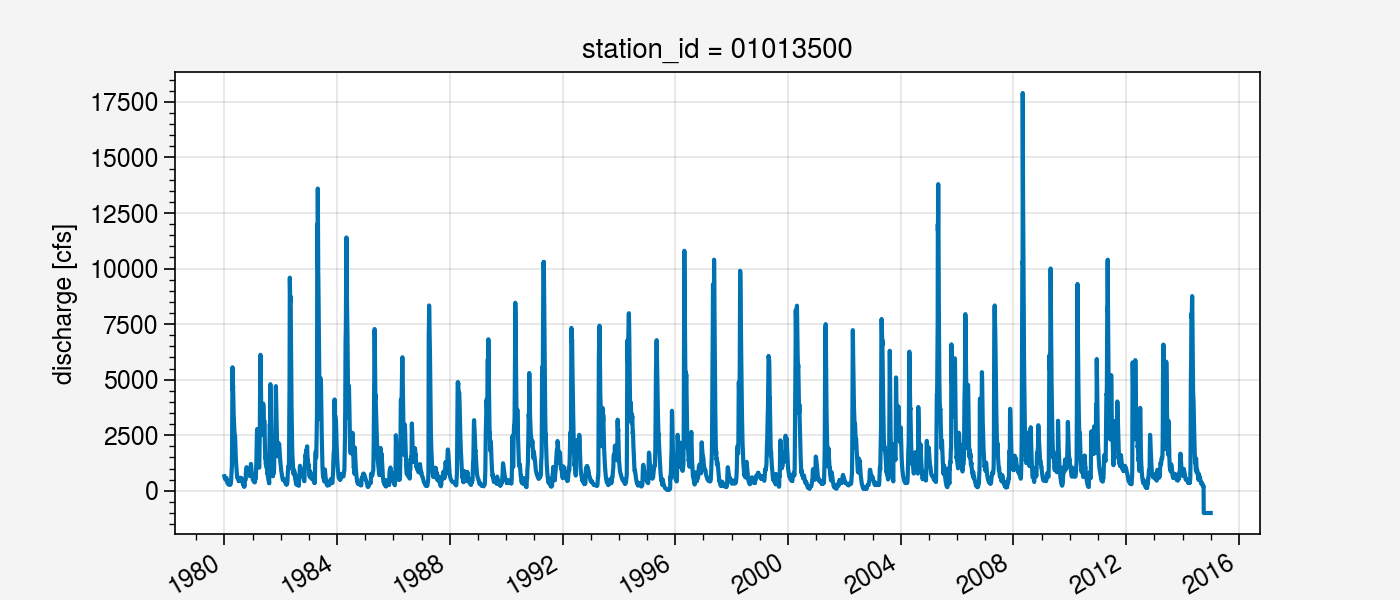

In [13]:
ax = qobs.sel(station_id="01013500").discharge.plot(figsize=(7, 3))
ax[0].figure.savefig(Path("plots", "qobs_01013500.png"))